# AI3601 Homework 1 
## Due: 23:59:59 (GMT +08:00), March 21, 2024 ##

# Section 1. Convergence of Value Iteration

Given an MDP with finite state space $S$, actions space $A$, and rewards $R(s,a,s')$. We first recursively define the optimal $V$-value function (the expected utility of state $s$ under optimal action) with reward function corresponding to state $s$, action $a$ and next state $s'$:
$$
V^*(s)=\max_a\sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V^*(s')],
$$

where $T(s,a,s')$ is the transition probability $P(s'|s,a)$.

Then, we recall the value iteration algorithm, which starts with $V_0(s)=0$, and computes the $V$ values by iterating according to the following rule:
$$
V_{k+1}(s)\leftarrow \max_a\sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V_k(s')],
$$


**Question 1.** Prove that $V_k(s)$ will converge to a unique optimal value $V^*(s)$ as $k\rightarrow \infty$.

Assume that $\gamma < 1$ holds. We define the Bellman operator $B^*$ as follows
$$
B^*V(s) = \max _a \sum_{s'} T(s,a,s') [ R(s,a,s') + \gamma V(s') ].
$$
Then the iteration rule can be written as $V_{k+1}(s)=B^*V_k(s)$. We prove the convergence of value iteration by showing that the Bellman operator $B^*$ is a contraction mapping. Notice that
$$
\begin{align*}
\| B^* V(s) - B^* V'(s) \|_{\infty} &= \max \limits _s \left| \max \limits _a \sum_{s'} T(s,a,s') [R(s,a,s') + \gamma V(s')] - \max \limits _a \sum_{s'} T(s,a,s') [R(s,a,s') + \gamma V'(s')] \right| \\
&\leq \max \limits _s \max \limits _a \left| \sum_{s'} T(s,a,s') [R(s,a,s') + \gamma V(s')] - \sum_{s'} T(s,a,s') [R(s,a,s') + \gamma V'(s')] \right| \\
&= \gamma \max \limits _s \max \limits _a \left| \sum_{s'} T(s,a,s') [V(s') - V'(s')] \right| \\
&\leq \gamma \max \limits _s \max \limits _a \sum_{s'} T(s,a,s') \max \limits _{s'} |V(s') - V'(s')| \\
&= \gamma \| V(s) - V'(s) \|_{\infty}.
\end{align*}
$$
which implies that $B^*$ is a contraction mapping. We claim that if the fixed point $V^*$ exists, it is unique. Suppose there are two fixed points $V^*$ and $V'^*$, we have
$$
\| V^*(s) - V'^*(s) \|_{\infty} = \| B^* V^*(s) - B^* V'^*(s) \|_{\infty}
$$
which is contradictory to the fact that $B^*$ is a contraction mapping. Therefore, the fixed point $V^*$ is unique. Now we prove that the fixed point $V^*$ exists. Notice that
$$
\begin{align*}
\| B^* V^n(s) - B^* V^m(s) \|_{\infty} &\leq \| V^n(s) - V^{n-1}(s) \|_{\infty} + \| V^{n-1}(s) - V^{n-2}(s) \|_{\infty} + \cdots + \| V^{m+1}(s) - V^m(s) \|_{\infty} \\
&\leq \gamma^{n-1} \| V^1(s) - V^0(s) \|_{\infty} + \gamma^{n-2} \| V^1(s) - V^0(s) \|_{\infty} + \cdots + \gamma^{m} \| V^1(s) - V^0(s) \|_{\infty} \\
&= \gamma^m \| B^* V^0(s) - V^0(s) \|_{\infty} \sum \limits _{k=0}^{n-m-1} \gamma^k \\
&\leq \frac{\gamma^m}{1-\gamma} \| B^* V^0(s) - V^0(s) \|_{\infty}
\end{align*}
$$
which implies that $\| B^* V^n(s) - B^* V^m(s) \|_{\infty}$ can be less than any $\epsilon > 0$ if $n$ and $m$ are large enough. Therefore, the sequence $\{V^k(s)\}$ is a Cauchy sequence and converges to a fixed point $V^*$, which verifies the convergence of value iteration.

# Section 2. Epsilon-greedy algorithm and UCB algorithm

In this part, we will implement two algorithms in a multi-armed bandit environment.

You are required to finish  <u>*two*</u>   coding exercises and answer <u>*two*</u> questions in the following notebook.


## Environment setting -- Multi-armed bandits

Consider a finite-armed stochastic bandit problem with $K$ arms where each arm $a$ has a stationary reward distribution $R(\cdot|a)$. The expected reward of arm $a$ is defined by $Q(a)=\mathbb{E}_{r\sim R(\cdot|a)}[r]$ and the optimal arm is $~a^{∗} =\argmax_{a}Q(a)$.

Each time $t$, we select one arm $a_{t}$ and obtain the reward $r_{t}\sim R(\cdot|a_t)$.

The expected regret can be defined as follows:

$$ \text{Regret}(t) = t \cdot Q(a^{∗}) - E\bigg[\sum_{i=0}^{t} r_{t}\bigg]  $$

We need to design an algorithm selecting arm to minimize the $\text{Regret}(T)$.



In [13]:
########################################

# Multi-armed bandits environment，we have three kind of settings based on the gap of mean rewards between arms 
# Here are three optional setting：

# ['small_gap','medium_gap','large_gap']

# small_gap: the gap of mean rewards between the best arms and second best arm are small. And similarly medium_gap and large_gap.

########################################

import numpy as np
from matplotlib import pyplot as plt

def set_seed(seed):
    np.random.seed(seed)

class MultiArmedBandit:
    def __init__(self, num_arms, avgs):
        self.num_arms = num_arms
        self.mus = avgs
        self.sigmas = [1.0] * self.num_arms

    def get_reward(self, arm):
        reward = np.random.normal(
            loc=self.mus[arm],
            scale=self.sigmas[arm]
        )
        return reward

    @property
    def best_arm(self):
        return np.argmax(self.mus)

def build_mab(mab_name):
    if mab_name == "small_gap":
        return MultiArmedBandit(10, [0.6, 0.9, 0.95, 0.8, 0.7, 0.3, 0.4, 0.1, 0.85, 0.5])
    if mab_name == "medium_gap":
        return MultiArmedBandit(10, [0.6, 0.8, 0.95, 0.8, 0.7, 0.3, 0.4, 0.1, 0.8, 0.5])
    if mab_name == "large_gap":
        return MultiArmedBandit(10, [0.6, 0.35, 0.95, 0.45, 0.2, 0.3, 0.4, 0.1, 0.15, 0.5])

## In this part, we try to implement two algorithms：(A) epsilon-greedy and (B) UCB algorithm in the MAB environment.

In [14]:
class AbstractAlgo:
    def __init__(self, mab):
        self.mab = mab
        self.num_arms = self.mab.num_arms

    def run(num_steps):
        raise NotImplementedError

### (A) Implement the epsilon-greedy algorithm.

At each round $t$, the agent explicitly explores a random arm with probability $ϵ$:

$$
a_{t} =
\begin{cases}
\argmax_{a}\ \widehat{Q}(a), & \text{w.p. } 1 − ϵ \\
\text{random arm}, & \text{w.p. } ϵ
\end{cases}
$$
where $\widehat{Q}(a)$ is the sample mean of arm $a$.

**Coding exercise.** Implement the epsilon-greedy algorithm.

In [15]:
class EpsilonGreedy(AbstractAlgo):
    def __init__(self, mab, epsilon):
        super().__init__(mab)
        self.num_pulls = np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)
        self.epsilon = epsilon

    def run(self, num_steps):
        # `rewards[t]` records the received reward at round t (zero-indexed).
        # `regrets[t]` records the corresponding regret at round t (zero-indexed).
        rewards = np.zeros(num_steps)
        regrets = np.zeros(num_steps)

        for t in range(num_steps):
            # Stabilize the algorithm by exploring each arm once at the begining.
            if t < self.num_arms:
                arm = t
                rewards[t] = self.mab.get_reward(arm)
                regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
                self.emp_means[arm] = rewards[t]
                continue

            """START YOUR CODE"""
            if np.random.rand() < self.epsilon:
                arm = np.random.choice(self.num_arms)
            else:
                arm = np.argmax(self.emp_means)
            rewards[t] = self.mab.get_reward(arm)
            regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
            self.num_pulls[arm] += 1
            self.emp_means[arm] += (rewards[t] - self.emp_means[arm]) / self.num_pulls[arm]
            """END"""

        # Reset.
        self.num_pulls = np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)

        return rewards, regrets

### (B) Implement the upper confidence bound (UCB) algorithm. 

At each round $t$, the UCB algorithm chooses an arm based on the following equation:
$$
a_{t} = \argmax_{a} \left[ \widehat{Q}(a) + \beta \sqrt{\frac{\log t}{2 N_t(a)}} \right]
$$

where $\widehat{Q}(a)$ is the sample mean of arm $a$, $N_t(a)$ is the visitation count of arm $a$ till round $t$, and $β$ is a scaling factor (a hyper-parameter).

**Coding exercise.** Implement the upper confidence bound (UCB) algorithm. 

In [16]:
class UCB(AbstractAlgo):
    def __init__(self, mab, beta):
        super().__init__(mab)
        self.emp_means = np.zeros(self.num_arms)
        self.num_pulls = np.ones(self.num_arms)
        self.beta = beta

    def run(self, num_steps):
        # `rewards[t]` records the received reward at round t (zero-indexed).
        # `regrets[t]` records the corresponding regret at round t (zero-indexed).
        rewards = np.zeros(num_steps)
        regrets = np.zeros(num_steps)

        for t in range(num_steps):
            # Stabilize the algorithm by exploring each arm once at the begining.
            if t < self.num_arms:
                arm = t
                rewards[t] = self.mab.get_reward(arm)
                regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
                self.emp_means[arm] = rewards[t]
                continue

            """START YOUR CODE"""
            ucb = self.emp_means + self.beta * np.sqrt(np.log(t) / (2 * self.num_pulls))
            arm = np.argmax(ucb)
            rewards[t] = self.mab.get_reward(arm)
            regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
            self.num_pulls[arm] += 1
            self.emp_means[arm] += (rewards[t] - self.emp_means[arm]) / self.num_pulls[arm]
            """END"""

        # Reset.
        self.num_pulls = np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)

        return rewards, regrets

## Running two algorithms in the multi-armed bandits environment

Here, we try to run two algorithms in our environment. You should run the following code without editing and answer **Question 2,3** based on the output. **Your output will be one of the criteria we use to score**.


You can also change the hyperparameters privately to get a better understanding of these two algorithms. 

In [17]:
SEED = 0
mad_name = ['small_gap', "medium_gap", "large_gap"] # type of bandit setting
num_iters = 10000                                   # num of iterations
num_simulations = 30                                # num of simulations

set_seed(SEED)

def run_the_algorithm(mad_name, num_iters, num_simulations):

    rewards_env = {}
    regrets_env = {}

    for mad in mad_name:
        env = build_mab(mad)
        agents = {
            "UCB with beta = 0.5": UCB(env, 0.5),
            "UCB with beta = 1.0": UCB(env, 1.0),
            "UCB with beta = 2.0": UCB(env, 2.0),
            "Epsilon-greedy with epsilon = 0.1": EpsilonGreedy(env, 0.1),
            "Epsilon-greedy with epsilon = 0.2": EpsilonGreedy(env, 0.2),
            "Epsilon-greedy with epsilon = 0.3": EpsilonGreedy(env, 0.3)
        }
        reward_records = {}
        regret_records = {}

        for name, agent in agents.items():
            average_rewards_all = np.zeros((num_simulations, num_iters))
            cumulative_regrets_all = np.zeros((num_simulations, num_iters))

            for n in range(0, num_simulations):
                rewards, regrets = agent.run(num_iters)
                average_rewards = np.cumsum(rewards) / np.arange(1, num_iters + 1)
                cumulative_regrets = np.cumsum(regrets)
                average_rewards_all[n] = average_rewards
                cumulative_regrets_all[n] = cumulative_regrets
            reward_records[name] = np.mean(average_rewards_all, axis=0)
            regret_records[name] = np.mean(cumulative_regrets_all, axis=0)

        rewards_env[mad] = reward_records
        regrets_env[mad] = regret_records

    return rewards_env,regrets_env

rewards_env, regrets_env = run_the_algorithm(mad_name, num_iters, num_simulations)

## Visualization

small_gap    UCB with beta = 0.5   regrets at t=10000   341.00780201770317
small_gap    UCB with beta = 1.0   regrets at t=10000   173.2492622598746
small_gap    UCB with beta = 2.0   regrets at t=10000   410.7314016177343
small_gap    Epsilon-greedy with epsilon = 0.1   regrets at t=10000   547.563009666157
small_gap    Epsilon-greedy with epsilon = 0.2   regrets at t=10000   815.3878698580751
small_gap    Epsilon-greedy with epsilon = 0.3   regrets at t=10000   1206.5777072801677
medium_gap    UCB with beta = 0.5   regrets at t=10000   677.1918942945238
medium_gap    UCB with beta = 1.0   regrets at t=10000   202.3216512366443
medium_gap    UCB with beta = 2.0   regrets at t=10000   414.7769917902429
medium_gap    Epsilon-greedy with epsilon = 0.1   regrets at t=10000   630.5374868849332
medium_gap    Epsilon-greedy with epsilon = 0.2   regrets at t=10000   878.3572066843147
medium_gap    Epsilon-greedy with epsilon = 0.3   regrets at t=10000   1150.0744518214358
large_gap    UCB wit

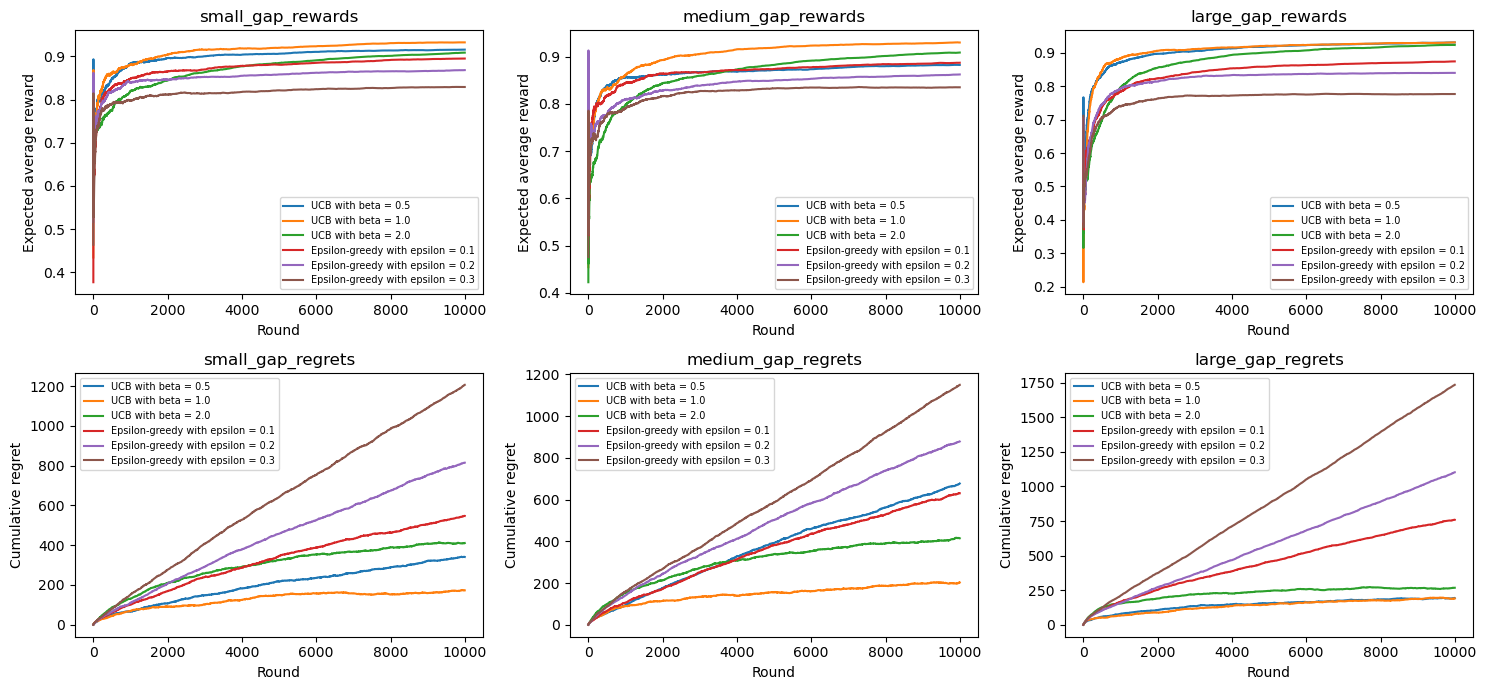

In [18]:
x_axis = [i for i in range(0, num_iters)]
fig = plt.figure(figsize=(15, 7))

for i in range(len(mad_name)):
    fig1 = plt.subplot(2, 3, i + 1)
    plt.xlabel("Round")
    plt.ylabel("Expected average reward")
    for name, rewards in rewards_env[mad_name[i]].items():
        plt.plot(x_axis, rewards, label=name)
    plt.legend(prop={"size": 7})
    plt.title(mad_name[i] + '_' + 'rewards')

for i in range(len(mad_name)):
    fig1 = plt.subplot(2,3,i+4)
    plt.xlabel("Round")
    plt.ylabel("Cumulative regret")
    for name, regrets in regrets_env[mad_name[i]].items():
        plt.plot(x_axis, regrets,label=name)
    plt.legend(prop={"size": 7})
    plt.title(mad_name[i] + '_' + 'regrets')

plt.tight_layout()

for i in range(len(mad_name)):
    for a in list(regrets_env[mad_name[i]].keys()):
        print(mad_name[i], "  ", a, "  regrets at t=10000  ", regrets_env[mad_name[i]][a][-1])

**Questions 2.** The sub-optimality gap $\Delta=Q(a^*)-\max_{a\neq a^*}Q(a)$ is an important feature of a bandit problem. Hence, our environment prove three sub-optimality gap: small gap, medium gap and large gap. Discuss your observations on the performance of two algorithms when facing different sub-optimality gaps.

For the epsilon-greedy algorithm, larger sub-optimality gap leads to faster convergence since the agent can easily distinguish the optimal arm from the sub-optimal arms. However, larger sub-optimality gap also leads to larger regret since the agent always conducts exploration with probability $\epsilon$.

For the UCB algorithm, larger sub-optimality gap also leads to faster convergence. However, larger sub-optimality gap leads to smaller regret because the agent balances exploration and exploitation, which avoids unnecessary exploration.

**Questions 3.** Discuss the impact of hyper-parameters like $\epsilon$, $\beta$.

For the epsilon-greedy algorithm, $\epsilon$ controls the exploration-exploitation trade-off. A larger $\epsilon$ leads to more exploration and less exploitation, which results in faster convergence but larger regret. A smaller $\epsilon$ leads to less exploration and more exploitation, which results in slower convergence but smaller regret.

For the UCB algorithm, $\beta$ controls the weight of uncertainty measure. A larger $\beta$ leads to more optimistic estimation of the arm value, and vice versa. However, both too large and too small $\beta$ can lead to larger regret. Only a moderate $\beta$ can lead to the optimal performance.

# Section 3. Value-iteration and Policy-iteration


In this part, we will implement value iteration and policy iteration algorithms in a Grid World environment.

You are required to finish  <u>*two*</u>   coding exercises and answer <u>*one*</u> question in the following notebook.

## Environment setting -- Grid World

Consider a known two-dimensional grid world environment. 

You will control an agent (the robot shown in the picture) in the environment to make it to the TERMINAL STATE. Each action has a probability of 20% to not behave as expected, as
specified in `getTransitionStatesAndProbs()`. When the agent enters the TERMINAL STATE, it must take the special ‘exit’ action to get the final reward. 

Your goal is to get the maximal rewards during each episode.

![](./pic.png)

More detail about the environment is in `setting.py`.


## In this part, we try to implement two algorithms：(A) value iteration algorithm and (B) policy iteration algorithm in the Grid World environment.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

import util
from setting import *

class Agent:
    """
    An agent must define a getAction method, but may also define the
    following methods which will be called if they exist:

    def registerInitialState(self, state): # inspects the starting state
    """
    def __init__(self, index=0):
        self.index = index

    def getAction(self, state):
        util.utilraiseNotDefined()

### (A) Implement the value-iteration algorithm

Recall the value iteration state update equation:

$$V_{k+1}(s) \leftarrow \max_{a} \sum_{s'}P(s'|s,a)[R(s,a,s')+\gamma V_{k}(s')]$$

**Coding exercise.** Implement a value iteration agent in `ValueIterationAgent`. Your value iteration agent is an offline planner, not a reinforcement learning agent, so the relevant hyperparameter is the maximum number of iterations of value iteration it should run in its initial planning phase.

You are also required to enable early stopping for value iteration by checking whether the maximum change of values among the states is smaller than hyper-parameter $\epsilon$ in an iteration.

Implement the following methods for `ValueIterationAgent`.

• Method `runValueIteration` computes the value function `self.values` by running the value iteration algorithm.

• Method `computeActionfromvalues(state)` computes the best action according to the value function given by `self.values`.

• Method `computeQvalueFromvalues(state, action)` returns the Q-value of the `(state, action)` pair given by the value function `self.values`.

In [20]:
class ValueIterationAgent(Agent):
    """An agent that takes a Markov decision process on initialization
    and runs value iteration for a given number of iterations.

    Hint: Test your code with commands like `python main.py -a value -i 100 -k 10`.
    """
    def __init__(self, mdp, discount = 0.9, epsilon=0.001, iterations = 100):
        """
          Your value iteration agent should take an mdp on
          construction, run the indicated number of iterations
          and then act according to the resulting policy.

          Some useful mdp methods you will use:
              mdp.getStates()
              mdp.getPossibleActions(state)
              mdp.getTransitionStatesAndProbs(state, action)
              mdp.getReward(state, action, nextState)
              mdp.isTerminal(state)
        """
        self.mdp = mdp
        self.discount = discount
        self.epsilon = epsilon  # For examing the convergence of value iteration
        self.iterations = iterations # The value iteration will run AT MOST these steps
        self.values = util.Counter() # You need to keep the record of all state values here
        self.runValueIteration()

    def runValueIteration(self):
        """ YOUR CODE HERE """
        for _ in range(self.iterations):
            new_values = util.Counter()
            for state in self.mdp.getStates():
                if self.mdp.isTerminal(state):
                    new_values[state] = 0
                else:
                    max_value = float('-inf')
                    for action in self.mdp.getPossibleActions(state):
                        max_value = max(max_value, self.computeQValueFromValues(state, action))
                    new_values[state] = max_value
            changes = [abs(new_values[state] - self.values[state]) for state in self.mdp.getStates()]
            if max(changes) < self.epsilon:
                break
            self.values = new_values
        """ END CODE HERE """
        return

    def getValue(self, state):
        """Return the value of the state (computed in __init__)."""
        return self.values[state]

    def computeQValueFromValues(self, state, action):
        """Compute the Q-value of action in state from the value function stored in self.values."""

        """ YOUR CODE HERE """
        value = 0
        for next_state, prob in self.mdp.getTransitionStatesAndProbs(state, action):
            value += prob * (self.mdp.getReward(state, action, next_state) + self.discount * self.values[next_state])
        """ END CODE HERE """
        return value

    def computeActionFromValues(self, state):
        """The policy is the best action in the given state
        according to the values currently stored in self.values.

        You may break ties any way you see fit. Note that if
        there are no legal actions, which is the case at the
        terminal state, you should return None.
        """
        """ YOUR CODE HERE """
        max_value, best_action = float('-inf'), None
        for action in self.mdp.getPossibleActions(state):
            value = self.computeQValueFromValues(state, action)
            if value > max_value:
                max_value, best_action = value, action
        """ END CODE HERE """
        return best_action

    def getPolicy(self, state):
        return self.computeActionFromValues(state)

    def getAction(self, state):
        return self.computeActionFromValues(state)

    def getQValue(self, state, action):
        return self.computeQValueFromValues(state, action)


### (B) Implement the policy iteration algorithm.

Let us recall the policy iteration algorithm as the first step. Given an MDP with a finite state space, action space, and reward function $R(s,a, s^{\prime})$. We first define the $V$-value function and $Q$-value function with reward function corresponding to state $s$, action $a$ and next state $s^{\prime}$. Specifically, the $V$-value of policy $\pi$ at state $s$ is defined as
 $$
     V^\pi(s)=\mathbb{E}\left[\sum_{t=0}^{\infty} \gamma^t R\left(s_t, a_t, s_t^{\prime}\right) \mid \pi, s_0=s\right]\,,
 $$
 and the $Q$-value of policy $\pi$ at state $s$ and action $a$ is defined as
 $$
     Q^\pi(s, a)=\mathbb{E}\left[\sum_{t=0}^{\infty} \gamma^t R\left(s_t, a_t, s_t^{\prime}\right) \mid \pi, s_0=s, a_0=a\right]\,.
 $$
Corresponding to the above $V$-value and $Q$-value function, recall that the policy iteration algorithm is equivalent to

• **Policy Evaluation:** For fixed current policy $\pi_i$,
    compute the $V$ values by iterating until values converge:
           $$
               V_{k+1}^{\pi_i}(s) \leftarrow \sum_{s^{\prime}} P\left(s, \pi_i(s), s^{\prime}\right)\left[R\left(s, \pi_i(s), s^{\prime}\right)+\gamma V_k^{\pi_i}\left(s^{\prime}\right)\right]\,,
           $$
           where $k$ denotes the iterating step when computing the values. 

• **Policy Improvement:** For fixed values, get a better policy using policy extraction:
           $$
                \pi_{i+1}(s)\in \arg \max _a \sum_{s^{\prime}} P\left(s, a, s^{\prime}\right)\left[R\left(s, a, s^{\prime}\right)+\gamma V^{\pi_i}\left(s^{\prime}\right)\right] 
           $$
           which is equivalent to $\pi_{i+1}(s)\in \arg \max _a Q^{\pi_i}(s,a)$.

**Coding exercise.** Implement a policy iteration agent in `PolicyIterationAgent`. 

Again, your policy iteration agent is an offline planner and the relevant hyperparameter is the maximum number of iterations of policy iteration, which is determined by hyperparameter iteration. Policy evaluation iterates until
values converge, which is also determined by hyperparameter $\epsilon$.

If the policy does not change in the policy improvement phase, policy iteration stops early.


In [21]:
import random

class PolicyIterationAgent(Agent):
    """An agent that takes a Markov decision process on initialization
    and runs policy iteration for a given number of iterations..
    """

    def __init__(self, mdp, discount = 0.9, epsilon=0.001, iterations = 100):
        self.mdp = mdp
        self.discount = discount
        self.epsilon = epsilon  # For examing the convergence of policy iteration
        self.iterations = iterations # The policy iteration will run AT MOST these steps
        self.values = util.Counter() # You need to keep the record of all state values here
        self.policy = dict()
        self.runPolicyIteration()

    def runPolicyIteration(self):
        """ YOUR CODE HERE """
        for state in self.mdp.getStates():
            if self.mdp.isTerminal(state):
                self.policy[state] = None
            else:
                self.policy[state] = random.choice(self.mdp.getPossibleActions(state))
        for _ in range(self.iterations):
            while True:
                new_values = util.Counter()
                for state in self.mdp.getStates():
                    if self.mdp.isTerminal(state):
                        new_values[state] = 0
                    else:
                        action = self.policy[state]
                        new_values[state] = self.computeQValueFromValues(state, action)
                changes = [abs(new_values[state] - self.values[state]) for state in self.mdp.getStates()]
                if max(changes) < self.epsilon:
                    break
                self.values = new_values
            new_policy = dict()
            for state in self.mdp.getStates():
                if self.mdp.isTerminal(state):
                    new_policy[state] = None
                else:
                    max_value, best_action = float('-inf'), None
                    for action in self.mdp.getPossibleActions(state):
                        value = self.computeQValueFromValues(state, action)
                        if value > max_value:
                            max_value, best_action = value, action
                    new_policy[state] = best_action
            if new_policy == self.policy:
                break
            self.policy = new_policy
        """END"""
        return

    def getValue(self, state):
        """Return the value of the state (computed in __init__)."""
        return self.values[state]

    def computeQValueFromValues(self, state, action):
        """Compute the Q-value of action in state from the value function stored in self.values."""

        """ YOUR CODE HERE """
        value = 0
        for next_state, prob in self.mdp.getTransitionStatesAndProbs(state, action):
            value += prob * (self.mdp.getReward(state, action, next_state) + self.discount * self.values[next_state])
        """END"""
        return value

    def computeActionFromValues(self, state):
        """The policy is the best action in the given state
          according to the values currently stored in self.values.

          You may break ties any way you see fit.  Note that if
          there are no legal actions, which is the case at the
          terminal state, you should return None.
        """

        """ YOUR CODE HERE """
        max_value, best_action = float('-inf'), None
        for action in self.mdp.getPossibleActions(state):
            value = self.computeQValueFromValues(state, action)
            if value > max_value:
                max_value, best_action = value, action
        """END"""
        return best_action

    def getPolicy(self, state):
        return self.policy[state]

    def getAction(self, state):
        return self.policy[state]

    def getQValue(self, state, action):
        return self.computeQValueFromValues(state, action)

## Running two algorithms in the GRID-WORLD environment and  Visualization

Here, we try to run two algorithms in our environment. You should run the following code without editing and answer **Questions 4** based on the output. **Your output will be one of the criteria we use to score**.


You also can change the hyperparameters privately to get a better understanding of these two algorithms. 




RUNNING 50 EPISODES
AGENT policy
ITERS: 1, AVERAGE SUM OF REWARDS FROM START STATE: 0.11178947037886068


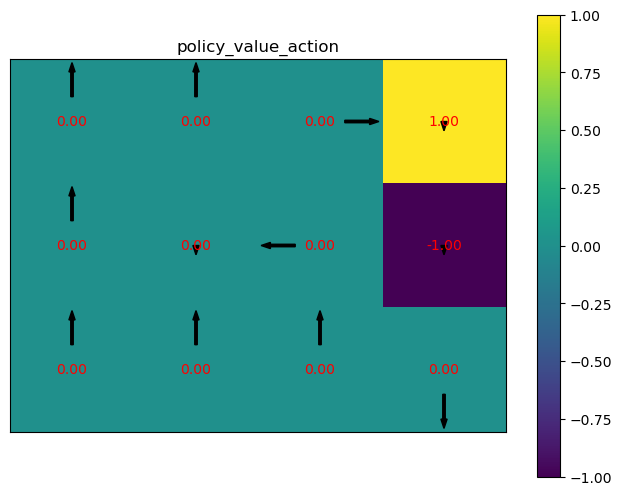


RUNNING 50 EPISODES
AGENT value
ITERS: 1, AVERAGE SUM OF REWARDS FROM START STATE: 0.12018999797465985


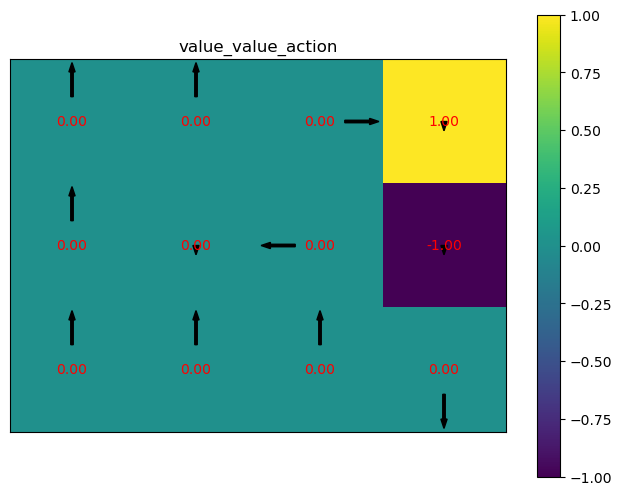


RUNNING 50 EPISODES
AGENT policy
ITERS: 2, AVERAGE SUM OF REWARDS FROM START STATE: 0.48716993223342003


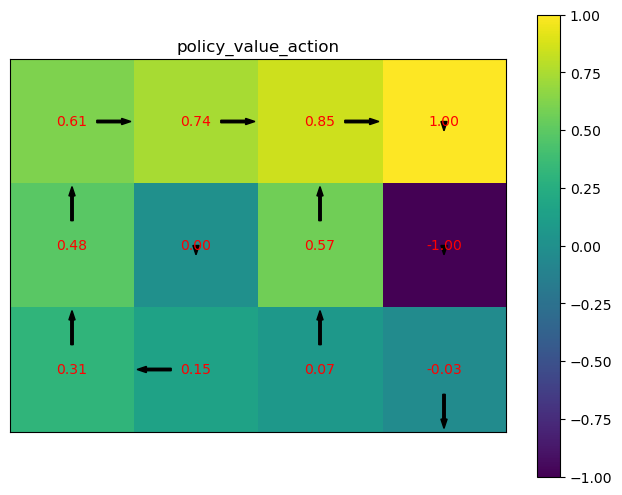


RUNNING 50 EPISODES
AGENT value
ITERS: 2, AVERAGE SUM OF REWARDS FROM START STATE: 0.22862519656869826


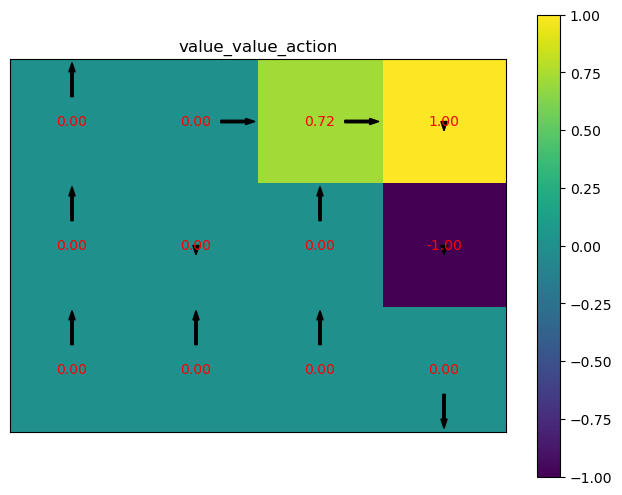


RUNNING 50 EPISODES
AGENT policy
ITERS: 3, AVERAGE SUM OF REWARDS FROM START STATE: 0.5316971545620002


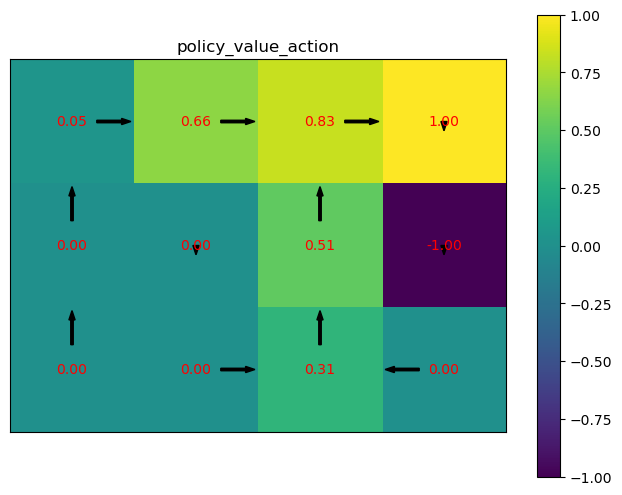


RUNNING 50 EPISODES
AGENT value
ITERS: 3, AVERAGE SUM OF REWARDS FROM START STATE: 0.5150235002418002


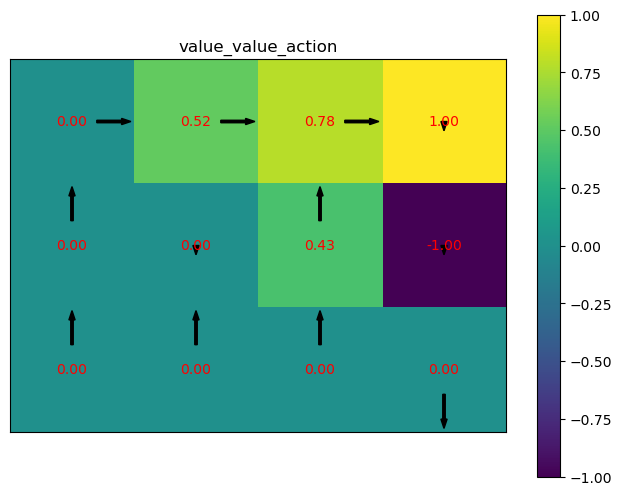


RUNNING 50 EPISODES
AGENT policy
ITERS: 4, AVERAGE SUM OF REWARDS FROM START STATE: 0.5119072035566582


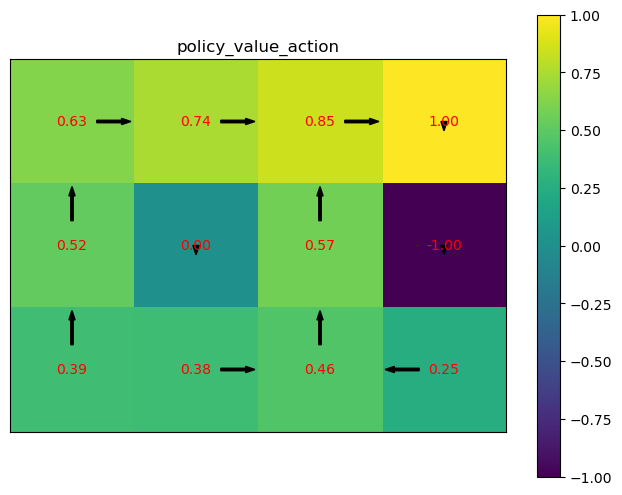


RUNNING 50 EPISODES
AGENT value
ITERS: 4, AVERAGE SUM OF REWARDS FROM START STATE: 0.4800391984818003


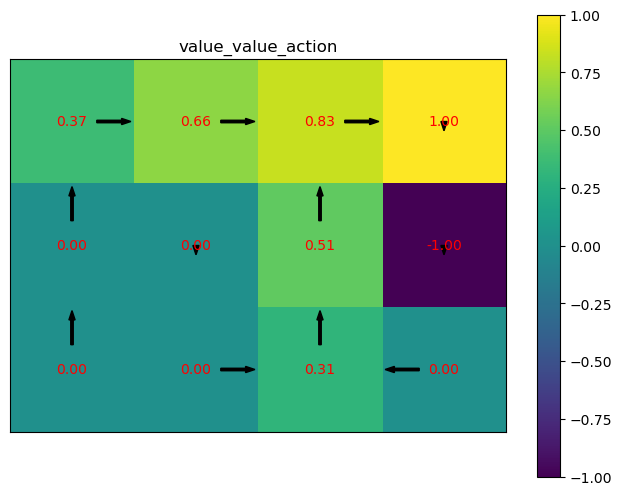


RUNNING 50 EPISODES
AGENT policy
ITERS: 5, AVERAGE SUM OF REWARDS FROM START STATE: 0.45913050146142


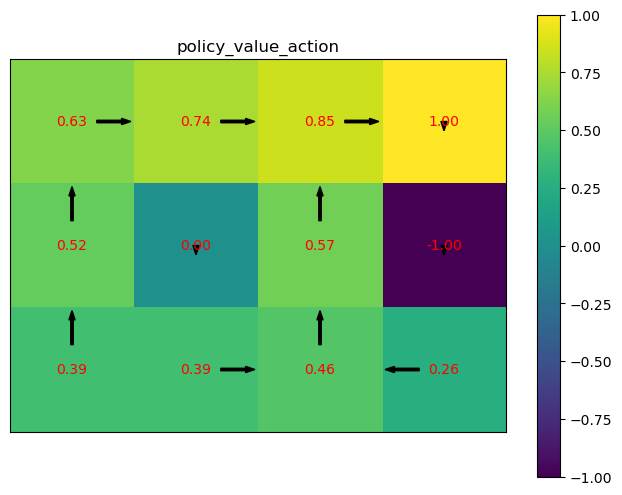


RUNNING 50 EPISODES
AGENT value
ITERS: 5, AVERAGE SUM OF REWARDS FROM START STATE: 0.4710348117017038


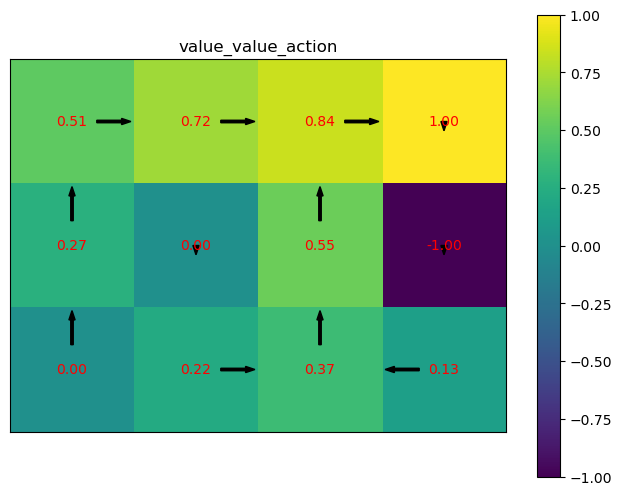

In [22]:
##### hyperparameters #####
np.random.seed(0)
grid = "BookGrid"               # type of environment,"BridgeGrid"#"BookGrid"
epsilon = 0.1
agents = ["policy", "value"]    # optional policy, value
iters_list = [1, 2, 3, 4, 5]    # num of iterations
discount = 0.9
episodes = 50
###############################

def runEpisode(agent, environment, discount, decision, message, pause, episode):
    returns = 0
    totalDiscount = 1.0
    environment.reset()
    if 'startEpisode' in dir(agent): agent.startEpisode()
    message("BEGINNING EPISODE: " + str(episode) + "\n")
    while True:
        # DISPLAY CURRENT STATE
        state = environment.getCurrentState()
        # display(state)
        pause()
        # END IF IN A TERMINAL STATE
        actions = environment.getPossibleActions(state)
        if len(actions) == 0:
            message("EPISODE " + str(episode) + " COMPLETE: RETURN WAS " + str(returns) + "\n")
            return returns
        # GET ACTION (USUALLY FROM AGENT)
        action = decision(state)
        if action == None:
            raise 'Error: Agent returned None action'
        # EXECUTE ACTION
        nextState, reward = environment.doAction(action)
        message("Started in state: " + str(state) +
                "\nTook action: " + str(action) +
                "\nEnded in state: " + str(nextState) +
                "\nGot reward: " + str(reward) + "\n")
        # UPDATE LEARNER
        if 'observeTransition' in dir(agent):
            agent.observeTransition(state, action, nextState, reward)
        returns += reward * totalDiscount
        totalDiscount *= discount

###########################
# GET THE GRIDWORLD
###########################

mdpFunction = eval("get" + grid)
mdp = mdpFunction()
env = GridworldEnvironment(mdp)

###########################
# GET THE DISPLAY ADAPTER
###########################

def get_values_actions(a, num):
    width = 0
    heigh = 0
    for i in range(len(list(a.values.keys()))):
        if len(list(a.values.keys())[i]) == 2:
            if width < list(a.values.keys())[i][0] + 1:
                width = list(a.values.keys())[i][0] + 1
            if heigh < list(a.values.keys())[i][1] + 1:
                heigh = list(a.values.keys())[i][1] + 1
    vi = np.zeros((heigh, width))
    action_x = np.zeros((heigh, width))
    action_y = np.zeros((heigh, width))
    for i in range(width):
        for j in range(heigh):
            vi[heigh - 1 - j][i] = a.values[(i, j)]
            if (i, j) not in a.policy:
                continue
            if a.policy[(i, j)] == "east":
                action_x[heigh - 1 - j][i] = num
                action_y[heigh - 1 - j][i] = 0
            elif a.policy[(i, j)] == "south":
                action_x[heigh - 1 - j][i] = 0
                action_y[heigh - 1 - j][i] = num
            elif a.policy[(i, j)] == "west":
                action_x[heigh - 1 - j][i] = -num
                action_y[heigh - 1 - j][i] = 0   
            elif a.policy[(i, j)] == "north":
                action_x[heigh - 1 - j][i] = 0
                action_y[heigh - 1 - j][i] = -num
    return vi, action_x, action_y

def plot_(value_mat, action_x, action_y, agent_type, env_name):
    if env_name == "BookGrid":
        vmin = -1
        vmax = 1
    elif env_name == "BridgeGrid":
        vmin = -100
        vmax = 10
    matrix = value_mat
    plt.figure(figsize=(value_mat.shape[1] * 2, value_mat.shape[0] * 2))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
    for i in range(value_mat.shape[0]):
        for j in range(value_mat.shape[1]):
            plt.text(j, i, '{:.2f}'.format(matrix[i, j]), ha='center', va='center', color='red')
            plt.arrow(j + action_x[i][j], i + action_y[i][j], action_x[i][j], action_y[i][j], color='black', width=0.02, head_width=0.05)
    plt.title(agent_type + "_value_action")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()

###########################
# RUN EPISODES
###########################

# messageCallback = lambda x: printString(x)
messageCallback = lambda x: None
# FIGURE OUT WHETHER TO WAIT FOR A KEY PRESS AFTER EACH TIME STEP
pauseCallback = lambda: None
# RUN EPISODES

sum_of_rewards_value = []
sum_of_rewards_policy = []

for iters in iters_list:
    for agent in agents:
        a = None
        if agent == 'value':
            a = ValueIterationAgent(mdp, discount, epsilon, iters)
        elif agent == 'policy':
            a = PolicyIterationAgent(mdp, discount, epsilon, iters)
        else:
            raise Exception('Unknown agent type: ' + agent)
        decisionCallback = a.getAction
        if episodes > 0:
            print()
            print("RUNNING", episodes, "EPISODES")
            print("AGENT", agent)
        returns = 0
        for episode in range(1, episodes + 1):
            returns += runEpisode(a, env, discount, decisionCallback, messageCallback, pauseCallback, episode)
        if episodes > 0:
            print("ITERS: " + str(iters) + ", AVERAGE SUM OF REWARDS FROM START STATE: " + str((returns + 0.0) / episodes))
        if agent == "value":
            sum_of_rewards_value.append((returns + 0.0) / episodes)
            a.policy = {}
            for key in list(a.values.keys()):
                a.policy[key] = a.getPolicy(key)
        else:
            sum_of_rewards_policy.append((returns + 0.0) / episodes)
        value_mat, action_x, action_y = get_values_actions(a, 0.2)
        plot_(value_mat, action_x, action_y, agent, grid)

**Questions 4.** Observe the pictures of all states against the number of iterations for both `ValueIterationAgent` and `PolicyIterationAgent`. Which algorithm converges to optimal policy faster? Explain your conclusion.

We can see that in the third iteration, the policy iteration algorithm has already converged to the optimal policy, while the value iteration algorithm has not, which implies that the policy iteration algorithm converges faster than the value iteration algorithm.

To some extent, this result lies in the features of the specific environment, where state and action spaces are relatively small. Thus, the policy tends to converge faster than the value function. Once the policy converges, the policy iteration algorithm converges and stops early, while the value iteration algorithm continues to iterate until the value function converges. However, this does not mean that the policy iteration algorithm is always faster. Since the value iteration algorithm only updates once in a single iteration, it can save lots of computation for large state and action spaces.